# Modelowanie Pandemii SARS COV-19

<ul>
    <li><a href="#Wstep">Wstęp</a></li>
    <li><a href="#Podstawy-teoretyczne">Podstawy teoretyczne</a>
        <ul style="margin-left: 20px;">
            <li><a href="#Lancuch-Markowa">Łańcuch Markowa</a></li>
            <li><a href="#Wprowadzenie-do-modelu-SI">Wprowadzenie do modelu SI</a></li>
            <li><a href="#Wprowadzenie-do-modelu-SIR">Wprowadzenie do modelu SIR</a></li>
            <li><a href="#Obliczanie-wspolczynnikow-beta-i-gamma">Obliczanie współczynników β i γ</a></li>
        </ul>
    </li>
    <li><a href="#Analiza-zachowania-modeli-SI-oraz-SIR">Analiza zachowania modeli SI oraz SIR</a>
        <ul style="margin-left: 20px;">
            <li><a href="#Rozwiazanie-analityczne-modelu-SI">Rozwiązanie analityczne modelu SI</a></li>
            <li><a href="#Metoda-Eulera-rozwiazywania-rownan-rozniczkowych">Metoda Eulera rozwiązywania równań różniczkowych</a></li>
            <li><a href="#Numeryczne-rozwiazanie-metoda-Eulera-rownania-SI">Numeryczne rozwiązanie metodą Eulera równania SI</a></li>
            <li><a href="#Numeryczne-rozwiazanie-metoda-Eulera-rownania-SIR">Numeryczne rozwiązanie metodą Eulera równania SIR</a></li>
            <li><a href="#Wyniki-modelowania-metoda-Eulera-dla-SI-i-SIR">Wyniki modelowania metodą Eulera dla SI i SIR</a></li>
            <li><a href="#Metoda-Runge-Kutta-rzedu-4-RK4-rozwiazywania-rownan-rozniczkowych">Metoda Runge-Kutta rzędu 4 (RK4) rozwiązywania równań różniczkowych</a></li>
            <li><a href="#Numeryczne-rozwiazanie-metoda-Runge-Kutta-rzedu-4-modelu-SI">Numeryczne rozwiązanie metodą Runge-Kutta rzędu 4 modelu SI</a></li>
            <li><a href="#Numeryczne-rozwiazanie-metoda-Runge-Kutta-rzedu-4-modelu-SIR">Numeryczne rozwiązanie metodą Runge-Kutta rzędu 4 modelu SIR</a></li>
            <li><a href="#Wyniki-modelowania-przy-uzyciu-metody-Runge-Kutta">Wyniki modelowania przy użyciu metody Runge-Kutta</a></li>
        </ul>
    </li>
    <li><a href="#Porownanie-bledow-numerycznych">Porównanie błędów numerycznych</a>
        <ul style="margin-left: 20px;">
            <li><a href="#Analityczne-rozwiazanie-modelu-SI">Analityczne rozwiązanie modelu SI</a></li>
            <li><a href="#Obliczanie-bledu-dla-metody-Eulera-i-RK4">Obliczanie błędu dla metody Eulera i RK4</a></li>
            <li><a href="#Wykresy-porownujace-metody-numeryczne-z-metoda-analityczna">Wykresy porównujące metody numeryczne z metodą analityczną</a></li>
            <li><a href="#Wykres-bledow">Wykres błędów</a></li>
            <li><a href="#Wykres-logarytmiczny">Wykres logarytmiczny</a></li>
        </ul>
    </li>
    <li><a href="#Podsumowanie">Podsumowanie</a></li>
    <li><a href="#Literatura">Literatura</a></li>
</ul>

---

<a id="Wstep"></a>
<h1>Wstęp</h1><br>
Choroby od zawsze stanowią nieodłączny element ludzkiego życia. Niektóre z nich, mogą wywołać ogromny strach i chaos w społeczeństwie. W ten sposób powstaja epidemie. W obliczu masowych zachorowań i rozprzestrzeniania się chorób zakaźnych, konieczne stało się opracowanie narzędzi pozwalających na przewidywanie dalszego przebiegu choroby. Wspomniane narzedzia nazywamy matematycznymi modelami epidemiologicznymi, które umożliwiają analizę dynamiki rozprzestrzeniania się choroby.

Modele epidemiologiczne zaczęły być opracowywane przez strach związany z epidemiami. Pierwszymi poważnymi próbami modelowania epidemii zajęli się William Ogilvy Kermack i Anderson Gray McKendrick, którzy w 1927 roku opracowali klasyczny model SIR. Natomiast model SI, który jest prostszą wersją modelu SIR, powstał nieco wcześniej, bo w latach 20. XX wieku, również w ramach badań nad epidemiami, i był szerzej stosowany do analizy mniej skomplikowanych chorób. Warto zauważyć, że wprowadzenie tych modeli nie było bezpośrednio związane z jedną, konkretną pandemią, ale wynikało z ogólnej potrzeby zrozumienia mechanizmów rozprzestrzeniania się chorób zakaźnych w społeczeństwie, zwłaszcza po epidemiach dżumy, grypy czy innych chorób zakaźnych, które dotykały społeczeństwa w tamtym czasie.

W ciągu ostatnich kilku lat byliśmy świadkami jednej z największych współczesnych epidemii – pandemii COVID-19. Wywołana przez wirusa SARS-CoV-2, pandemia ta miała globalny zasięg i dotknęła miliony ludzi na całym świecie. W wyniku jej rozwoju, społeczeństwa zostały zmuszone do wprowadzenia surowych środków zapobiegawczych, takich jak lockdowny, które trwały przez niemal dwa lata. Jednakże dzięki modelom można było dokładniej przewidzieć przebieg choroby, a nawet przygotować strategię mającą za zadanie ograniczyć jej rozprzestrzenianie . W ramach tego projektu omówimy szczegółową budowę modeli SI i SIR, przeanalizujemy ich rozwiązania numeryczne oraz analityczne oparte o dane z przebiegu pandemii oraz porównamy błędy, które mogą występować przy stosowaniu tych modeli do rzeczywistych danych.<br><br>

---

<a id="Podstawy-teoretyczne"></a>
<h1>Podstawy teoretyczne</h1><br>

Na potrzeby analizy metod numerycznych i analitycznych będziemy się używać danych rzeczywistych z pierwszych 36 dni epidemii wirusa SARS COV-19, gromadzone na oficjalnej stronie [nazwa strony].

In [620]:
n = 37900000  # Ilość populacji w Polsce
S0 = 37899999  # Początkowa ilość osób podatnych na infekcję
I0 = 1    # Początkowa ilość osób zakażonych
R0 = 0    # Początkowa ilość ozdrowieńców  
dates = ['04.03.2020', '05.03.2020', '06.03.2020', '07.03.2020', '08.03.2020', '09.03.2020','10.03.2020', '11.03.2020', '12.03.2020', 
         '13.03.2020', '14.03.2020', '15.03.2020','16.03.2020', '17.03.2020', '18.03.2020', '19.03.2020', '20.03.2020', '21.03.2020', 
         '22.03.2020', '23.03.2020', '24.03.2020', '25.03.2020', '26.03.2020', '27.03.2020', '28.03.2020', '29.03.2020', '30.03.2020', 
         '31.03.2020', '01.04.2020','02.04.2020', '03.04.2020', '04.04.2020', '05.04.2020', '06.04.2020', '07.04.2020', '08.04.2020'] # Daty okresu, który badamy
infected_data = [1, 1, 3, 6, 11, 17, 22, 31, 51, 68, 104, 125, 177, 238, 287, 355, 425, 536, 634, 749, 901, 
                 1051, 1221, 1389, 1638, 1862, 2055, 2311, 2554, 2946, 3383, 3627, 4102, 4413, 4848, 5205] # Ilośc zakażeń przypadająca na dzień
recovery_data = [0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 3, 4, 5, 5, 5, 5, 5, 7, 8, 10, 
                 14, 16, 16, 18, 22, 31, 33, 43, 57, 71, 195, 228, 269, 320, 381] # Ilość ozdrowień przypadająca na dzień

<a id="Lancuch-Markowa"></a>
<h2>Łańcuch Markowa</h2>

Łańcuchy Markowa to matematyczne narzędzie, które znajduje szerokie zastosowanie w modelowaniu procesów stochastycznych, gdzie przyszły stan systemu zależy tylko od jego obecnego stanu, a nie od historii. Tego rodzaju procesy oparte na tzw. "braku pamięci" pozwalają na analizowanie i przewidywanie dynamiki zjawisk, które zachodzą w czasie, takich jak rozprzestrzenianie się chorób, ewolucja populacji czy decyzje gospodarcze.


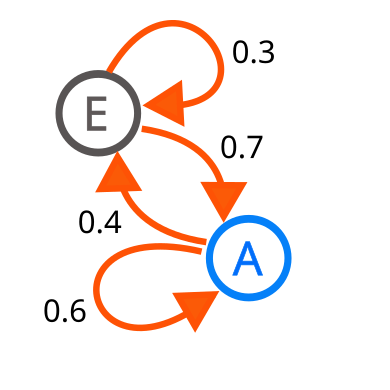

Łańcuchy Markowa oraz modele SI i SIR łączy fakt, że oba narzędzia służą do opisywania procesów przejścia z jednego stanu do drugiego w sytuacjach dynamicznych. Modele te przedstawiają zbiór stanów (ogniwa), przejścia między nimi (wiązania) oraz prawdopodobieństwo nastąpienia danego przejścia. Kluczowym założeniem, jest to, że procesy te są "bez pamięci", co oznacza, że decyzja o przejściu do kolejnego stanu zależy wyłącznie od aktualnego stanu, a nie od historii wcześniejszych przejść. Na przykład, w kontekście modeli SIR i SI, skupiamy się na stanie faktycznym, a nie na sytuacji, w której dana jednostka już kiedyś była chora.

Jednakże, w przeciwieństwie do klasycznych łańcuchów Markowa, które zakładają stałe prawdopodobieństwo przejścia między stanami, modele SIR i SI są bardziej złożone. W tych modelach prawdopodobieństwa przejść zależą od różnych czynników, takich jak współczynnik zakażeń ($\beta$) lub wyzdrowień ($\gamma$) oraz czas trwania infekcji, które zmieniają się w zależności od etapu epidemii, siły choroby oraz innych parametrów epidemiologicznych. Na przykład, współczynnik zakażeń może się różnić w zależności od stopnia kontaktów międzyludzkich, dostępności leczenia czy interwencji zdrowotnych, co sprawia, że te modele są bardziej dynamiczne i uwzględniają zmienność w czasie.

W związku z tym, można stwierdzić, że modele SIR i SI są pochodnymi łańcuchów Markowa. Natomiast dzięki bardziej złożónym parametrom modele epidemiologiczne lepiej analizują rozprzestrzeniania się chorób, które uwzględniają zmieniające się warunki oraz charakterystykę populacji. 

<a id="Wprowadzenie-do-modelu-SI"></a>
<h2>Wprowadzenie do modelu SI</h2><br>

Model SI (Susceptible-Infected) jest podstawowym modelem epidemiologicznym wykorzystywanym do opisu rozprzestrzeniania się chorób zakaźnych w populacji. Zakłada on dwie podstawowe grupy: osoby podatne na zakażenie $(S)$ oraz osoby zakażone $(I)$. Razem tworzą one populację $(N)$. 
$${N} = {S} + {I} \tag{1}$$
Osoby zakażone mogą przekazywać chorobę osobom podatnym, co prowadzi do wzrostu liczby zakażonych, podczas gdy liczba osób podatnych maleje. Kluczowym parametrem w modelu jest szybkość zarażania $\beta$, który opisuje tempo, z jakim choroba jest przekazywana. Współczynnik ten zależy od liczby kontaktów między osobami zakażonymi a osobami podatnymi na zakażenie. Możemy wyróżnić:
$$
\beta \cdot I - \text{Liczba kontaktów ogólna} \\
\beta \cdot I \cdot \frac{S}{N} - \text{Liczba kontaktów z podatnymi}
$$

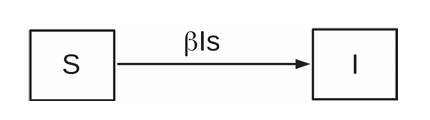

Schemat modelu SI. Rysunek jest z artykulu [numer artykulu]. Małe s na obrazku reprezentuje $S/N$. Jest to także przykładowy łańcuch markowa.

Przyrost nowych zakażeń($I_{new}$) można zapisać wzorem:
$$ {I_{new}} = \delta \cdot \beta \cdot I \cdot \frac{S}{N}$$
Dodatkowo zmianę liczby zakażeń w czasie można zapisać jako:
$$I( t + \delta ) = I(t) + I_{new} $$
Dzieki temu otrzymamy:
$$I( t + \delta ) = I(t) + \delta \cdot \beta \cdot I \cdot \frac{S}{N}$$
Po odpowiednich przekształceniach[numer artykulu] dostaniemy 
$$\frac{dI}{dt} = \beta \cdot I(t) \cdot \frac{S(t)}{N} \tag{2}$$

Model ten jest stosunkowo prosty i skuteczny w analizie wczesnych etapów epidemii, gdy nie uwzględniamy jeszcze osób wyleczonych, zmarłych, ani innych czynników, które mogą wpływać na dynamikę choroby. Model SI jest szczególnie użyteczny do prognozowania, jak szybko będzie rosła liczba zakażonych w populacji, szczególnie w fazie wzrostu epidemii.

Na potrzebę pokazania jak zachowuje się Model SI w czasie Pandemii przyjmiemy inne dane, ponieważ dla $n=37.900.000$ przy pierwszych 37 dniach nie zobaczymy pełnego zachowania Pandemii, przyjmiemy, że $n=7000$.

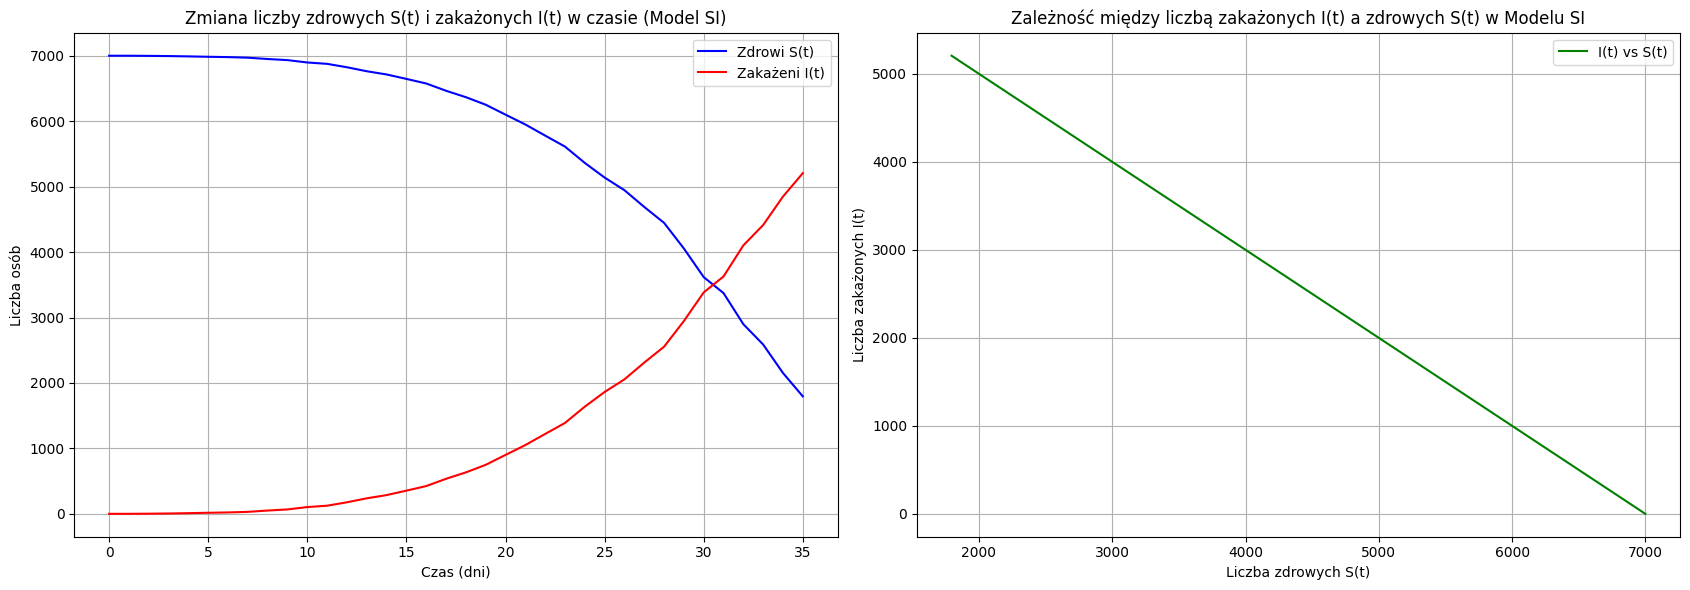

In [621]:
import matplotlib.pyplot as plt

# Parametry
N = 7000  # Całkowita liczba osób w populacji
susceptible_data = [N - infected_data[i] for i in range(len(infected_data))]

# Wykresy
fig, ax = plt.subplots(1, 2, figsize=(17, 6))

# Wykres S(t) i I(t) na jednym wykresie
ax[0].plot(susceptible_data, label="Zdrowi S(t)", color='blue')
ax[0].plot(infected_data, label="Zakażeni I(t)", color='red')
ax[0].set_title("Zmiana liczby zdrowych S(t) i zakażonych I(t) w czasie (Model SI)")
ax[0].set_xlabel("Czas (dni)")
ax[0].set_ylabel("Liczba osób")
ax[0].legend()
ax[0].grid(True)

# Wykres I(t) w zależności od S(t)
ax[1].plot(susceptible_data, infected_data, label="I(t) vs S(t)", color='green')
ax[1].set_title("Zależność między liczbą zakażonych I(t) a zdrowych S(t) w Modelu SI")
ax[1].set_xlabel("Liczba zdrowych S(t)")
ax[1].set_ylabel("Liczba zakażonych I(t)")
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

Na pierwszym wykresie można zaobserwować, że liczba osób zdrowych $S(t)$ i zakażonych $I(t)$ zmienia się w sposób wzajemnie powiązany. Ze względu na założenie modelu SI, który nie uwzględnia wyzdrowienia, liczba osób zdrowych ostatecznie spada do zera, a liczba zakażonych osiąga całkowitą populację. Tę zależność mamy pokazaną na drugim wykresie $I(S)$, na którym wyraźnie widać, że wraz ze wzrostem liczby zakażonych liczba osób zdrowych maleje.

<a id="Wprowadzenie-do-modelu-SIR"></a>
<h2>Wprowadzenie do modelu SIR</h2><br>

Model SIR (Susceptible-Infected-Recovered) wprowadza do wcześniej poznanych kategorii $S(t)$ (osoby podatne na zakażenie) oraz $I(t)$ (osoby zakażone) nową kategorię: $R(t)$ (osoby wyzdrowiałe lub zmarłe). Do kategorii zaliczają się osoby, które nie są już dłużej zakażone. Obejmuje to zarówno osoby, które zmarły w wyniku choroby, jak i te, które wyzdrowiały, nabywając odporność (nie mogą zachorować ponownie).
W przeciwieństwie do modelu SI, w modelu SIR liczba zakażonych osiąga szczyt, a następnie maleje, ponieważ coraz więcej osób przechodzi do kategorii 
$R(t)$ . Jest to jeden z podstawowych modeli epidemiologicznych, szeroko stosowany do opisu przebiegu epidemii.
Dodatkowo w modelu pojawia się nowy parametr: szybkość zdrowienia $\gamma$, który określa tempo przechodzenia osób zakażonych do kategorii $R(t)$ . Liczbę ozdrowień w czasie możemy wyrazić wzorem:
$$\gamma \cdot {I} - \text{Liczba ozdrowień w czasie}$$

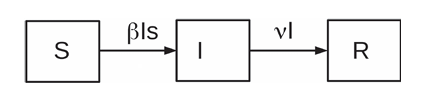

Schemat modelu SIR. Rysunek jest z artykulu [numer artykulu]. Małe s na obrazku reprezentuje $S/N$, a ${v}$ gammę. Jest to także przykładowy łańcuch markowa.

Możemy zapisać równanie:
$$ S(t + \delta) = S(t) - I_{new}$$
Dzięki czemu dla liczby osobników podatnych otrzymamy
$$\frac{dS}{dt} = - \beta \cdot {I(t)} \cdot \frac{S(t)}{N} \tag{3}$$
Po odpowiednich przekształceniach dostaniemy:

$$\frac{dI}{dt} = \beta \cdot I(t) \cdot \frac{S(t)}{N} - \gamma \cdot {I} \tag{4}$$
$$\frac{dR}{dt} = \gamma \cdot {I} \tag{5}$$
Te trzy równania $(3), (4), (5)$ stanowią ostateczną postać modelu SIR, opisującą dynamikę zmian w liczebności poszczególnych grup.
Model SIR można rozszerzyć, wprowadzając różne relacje pomiędzy grupami, np. uwzględniając sytuację, w której osobnik nie nabywa odporności i może ponownie zachorować. Jednak w naszym projekcie skupimy się na jego klasycznej formie. Model ten, mimo swojej prostoty, jest kluczowym narzędziem do analizy rozprzestrzeniania się chorób i stanowi fundament bardziej zaawansowanych modeli epidemiologicznych.

Na potrzebę pokazania jak zachowuje się Model SIR w czasie Pandemii przyjmiemy inne dane, ponieważ dla $n=37.900.000$ przy pierwszych 37 dniach nie zobaczymy pełnego zachowania Pandemii, przyjmiemy, że $n=7000$.

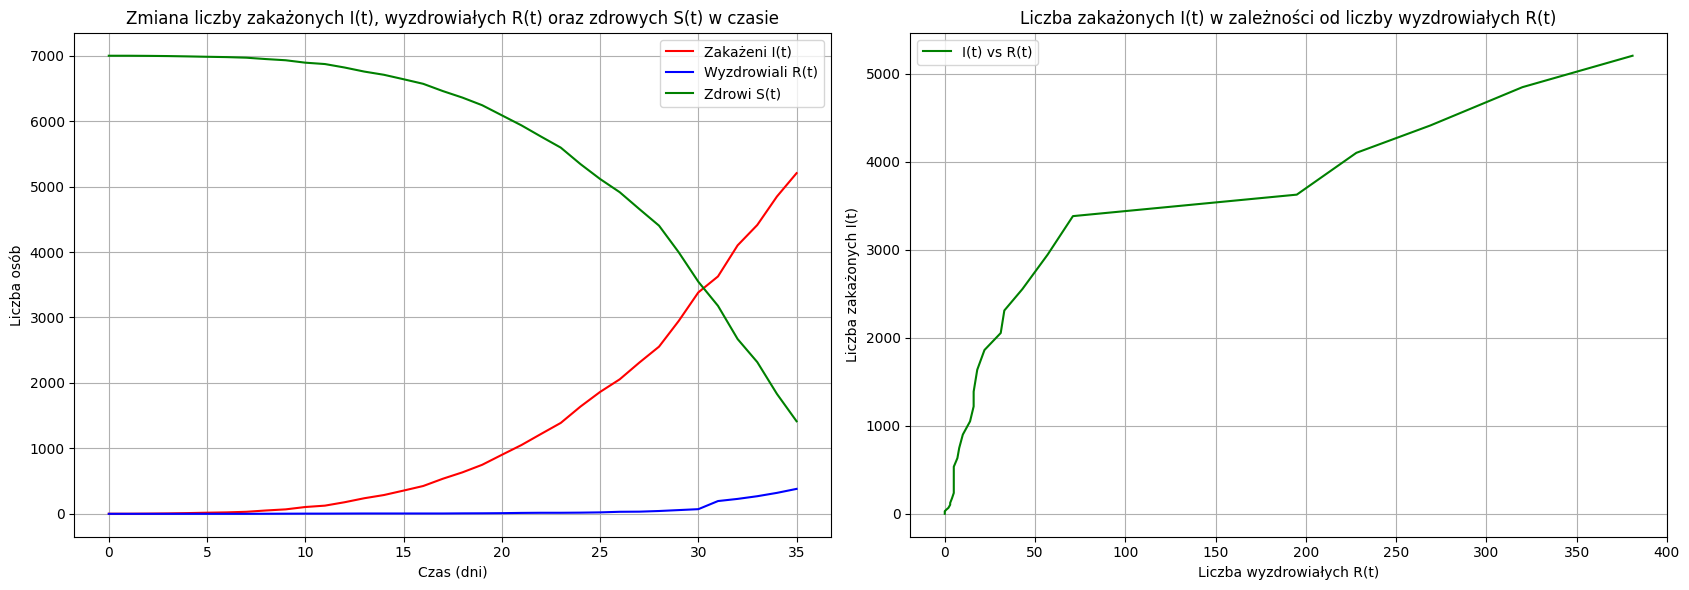

In [622]:
import matplotlib.pyplot as plt

# Parametry
N = 7000
# Susceptible (S) to być obliczone jako pozostała liczba osób
susceptible_data = [N - infected_data[i] - recovery_data[i] for i in range(len(infected_data))]

# Tworzymy wykresy
fig, ax = plt.subplots(1, 2, figsize=(17, 6))

# Wykres I(t), R(t) i S(t) na jednym wykresie
ax[0].plot(infected_data, label="Zakażeni I(t)", color='red')
ax[0].plot(recovery_data, label="Wyzdrowiali R(t)", color='blue')
ax[0].plot(susceptible_data, label="Zdrowi S(t)", color='green')
ax[0].set_title("Zmiana liczby zakażonych I(t), wyzdrowiałych R(t) oraz zdrowych S(t) w czasie")
ax[0].set_xlabel("Czas (dni)")
ax[0].set_ylabel("Liczba osób")
ax[0].legend()
ax[0].grid(True)

# Wykres I(t) w zależności od R(t)
ax[1].plot(recovery_data, infected_data, label="I(t) vs R(t)", color='green')
ax[1].set_title("Liczba zakażonych I(t) w zależności od liczby wyzdrowiałych R(t)")
ax[1].set_xlabel("Liczba wyzdrowiałych R(t)")
ax[1].set_ylabel("Liczba zakażonych I(t)")
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()



Na pierwszym wykresie można zauważyć, że zmiany $S(t)$ oraz $I(t)$ przebiegają podobnie jak w modelu SI. Jednak w modelu SIR pojawia się dodatkowa krzywa $R(t)$, reprezentująca ozdrowieńców, która odgrywa kluczową rolę w późniejszych etapach epidemii. Wraz ze wzrostem liczby ozdrowieńców liczba zakażonych zaczyna maleć, co stanowi fundamentalną różnicę między modelami SI a SIR. Drugi wykres przedstawia zależność $I(R)$. Początkowo dynamiczny wzrost liczby zakażonych występuje równocześnie z powolnym przyrostem ozdrowieńców. Jednak w miarę wzrostu wartości $R(t)$, tempo przyrostu zakażonych zaczyna stopniowo maleć.


---

<a id="Obliczanie-wspolczynnikow-beta-i-gamma"></a>
<h2>Obliczanie współczynników β i γ</h2><br>

### Metoda brute force

Algorytm brute force, czyli "siłowy", polega na przeszukaniu całego dostępnego zakresu możliwych wartości dla współczynników $\beta$ i $\gamma$ oraz znalezieniu takich, które minimalizują błąd dopasowania modelu do danych.

1. Zaczynamy od ustalenia zakresu wartości, w którym będziemy szukać optymalnych współczynników $\beta$ oraz $\gamma$.

2. Dla każdej pary wartości $\beta$ i $\gamma$ rozwiązujemy równania modelu SIR lub SI, a następnie obliczamy, jak bardzo przewidywane wyniki różnią się od rzeczywistych danych zakażonych (I) i wyzdrowiałych (R). Błąd dopasowania jest mierzony jako średni błąd kwadratowy (Mean Squared Error - MSE).

3. Algorytm przechodzi przez wszystkie kombinacje $\beta$ i $\gamma$ w zadanym zakresie, obliczając dla każdej kombinacji błąd dopasowania. Na końcu wybieramy parametry, które minimalizują ten błąd.

### Mean Squared Error

Mean Squared Error(MSE) to metoda wyznaczania błędu dopasowania modelu do danych rzeczywistych, polega na obliczeniu średniej z kwadratu różnicy danych rzeczyiwstych i danych pochodzących z modelu matematycznego. Wyrażenie różnic jako kwadratów jest konieczne, aby wyeliminować sytuacje, w której dodatnie i ujemne różnice odejmowałyby się od siebie dając wynik równy zero.

**Wzór na błąd średniokwadratowy (MSE):**
$$\text{MSE} = \frac{\sum_{i=1}^{n} (y_i - p_i)^2}{n}$$
+ $y_i$ realna wartość 
+ $p_i$ modelowana wartość
+ $n$ liczba obserwacji
+ $\Sigma$ suma wszystkich różnić
### Zastosowanie

Metoda brute force jest stosunkowo prosta, ale może być czasochłonna przy dużych zakresach parametrów. Pomimo tego jest bardzo intuicyjna i skuteczna w przypadku małych przestrzeni poszukiwań. Po znalezieniu optymalnych współczynników możemy wykorzystać model SIR lub SI do prognozowania przyszłego rozwoju epidemii.

 W dalszej częsci projektu współczynniki dla modelu SIR będziemy dopasowywać uzywając danej metody numerycznej posługując się powyższym schematem. Natomiast dla modelu SI skorzystamy z metody analitycznej, którą również połączymy z metodą Brute Force'a, żeby wyznaczyć optymalny wspołczynnik $\beta$.

---

<a id="Analiza-zachowania-modeli-SI-oraz-SIR"></a>
<h1>Analiza zachowania modeli SI oraz SIR</h1><br>

<a id="Rozwiazanie-analityczne-modelu-SI"></a>
<h2>Rozwiązanie analityczne modelu SI</h2><br>

Ze względu na swoją prostotę model SI można rozwiązać analitycznie. Rozważamy równanie opisujące dynamikę liczby zakażonych $(2)$:
$$\frac{dI}{dt} = \beta S I \tag{2}$$
gdzie $\beta$ jest współczynnikiem transmisji, $S$ to liczba osób podatnych, a $I$  to liczba osób zakażonych. Zakładamy przy tym, że całkowita populacja $N$  pozostaje stała, co pozwala wyrazić $S$  jako:$~~S = N - I$.
Zatem po podstawieniu otrzymamy:
$$\frac{dI}{dt} = \beta \left(N - I \right) I$$
Następnie możemy wyrażenie z całościować:
$$\int \frac{1}{I \left(N - I \right)}~~dI = \int \beta ~~dt $$
Aby rozwiązać całkę po lewej stronie, musimy użyć rozkładu na ułamki proste:
$$ \frac{1}{I \left(N - I \right)} = \frac{A}{I} + \frac{B}{N - I}$$
Po jego rozwiązaniu otrzymamy:
$$ \frac{1}{I \left(N - I \right)} = \frac{1}{N} \left(\frac{1}{I} + \frac{1}{N - I}\right)$$
Stąd dostaniemy:
$$\int  \frac{1}{N} \left(\frac{1}{I} + \frac{1}{N - I}\right)~~dI = \int \beta ~~dt$$
Po odpowiednich przekształceniach powstanie:
$$\ln \frac{I}{N - I} = N \beta t + C$$
Ponieważ $I$ oraz $N - I$ nie osiagają wartości ujemnych mogliśmy swobodnie opuścić wartość bezwzględną przy logarytmie naturalnym.
Po podstawieniu $e$ dostaniemy:
$$\frac{I}{N -I} = D e^{N \beta t}$$
gdzie $D = e^{C}$ (stała).
Po odpowiednich przekształceniach dojdziemy do postaci:
$$ I = \frac{N D e^{N \beta t}}{1 + D e^{N \beta t}}$$
Korzystając z faktu $ I\left(0\right) = I_0 $ dostajemy $D = \frac{I_0}{N - I_0} $. Po podstawieniu $D$ otrzymamy:
$$ I(t) = \frac{N \frac{I_0}{N - I_0} e^{N \beta t}}{1 + \frac{I_0}{N - I_0} e^{N \beta t}} = \frac{N I_0 e^{N \beta t}}{N  + I_0 (e^{N \beta t} - 1)} \tag{6} $$
Jest to rozwiązanie analityczne układu SI.
Na potrzeby dalszych obliczeń skorzystamy z:
$$I(t) = \frac{N I_0 e^{\beta t}}{S_0 + I_0 e^{\beta t}} \tag{7}$$
gdzie $S_0 = N - I_0$.

Korzystając z $(7)$ oraz metody MSE możemy policzyc optymalne $\beta$ z przedziału $[0.2; 0.4]$ dla modelu SI, które wykorzystamy w obliczeniach metod numerycznych dla modelu SI.

In [623]:
import numpy as np
from scipy.optimize import minimize

t = np.arange(len(infected_data))  

# Model SI
def I_model(beta, t, I0, N):
    S0 = N - I0
    return (N * I0 * np.exp(beta * t)) / (S0 + I0 * np.exp(beta * t))

# MSE
def mse(beta):
    I_simulated = I_model(beta, t, I0, n)
    return np.mean((np.array(I_simulated) - np.array(infected_data))**2)

# Szukanie najlepszej bety
result = minimize(mse, x0=0.3, bounds=[(0.2, 0.4)]) 
best_beta_an = result.x[0]
print(f"Najlepsza wartość beta: {best_beta_an:.4f}")

Najlepsza wartość beta: 0.2527


<a id="Metoda-Eulera-rozwiazywania-rownan-rozniczkowych"></a>
<h1>Metoda Eulera rozwiązywania równań różniczkowych</h1><br>

### Wyjaśnienie metody Eulera

Metoda Eulera służy do rozwiązywania równań różniczkowych pierwszego rzędu w postaci [[x]](https://vistula.pk.edu.pl/~sciezor/Kurs_TI_XP/Excel2_lekcja_4.pdf):
$$\frac{dy}{dt} = f(t, y), \quad y(x_0) = y_0$$
Zakładamy, że każdy kolejny punkt jest oddalony o krok **h** na osi **OX** oraz o $\Delta y$ na osi **OY**:
$$ x_{n+1} = x_n + h $$
Z definicji pochodnej, rozumianej jako tangens kąta nachylenia stycznej w punkcie na wykresie funkcji, wynika, że:
$$ y' = \frac{\Delta y}{h} = f(x_n, y_n) $$
Po przekształceniu:
$$ \Delta y = h \cdot f(x_n, y_n) $$
Wzór na kolejny $y_{n+1}$ będzie zależał od $y_n$ oraz $\Delta y$:
$$ y_{n+1} = y_n + h \cdot f(x_n, y_n) $$


<a id="Numeryczne-rozwiazanie-metoda-Eulera-rownania-SI"></a>
<h2>Numeryczne rozwiązanie metodą Eulera równania SI</h2><br>

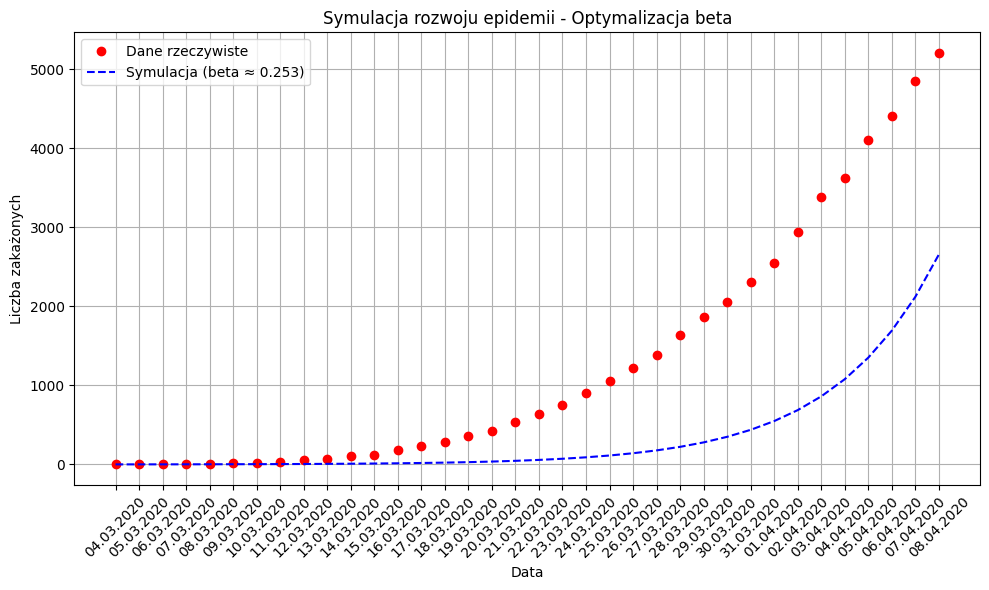

In [624]:
import numpy as np
import matplotlib.pyplot as plt

def update(beta):
    t_max = len(dates)  
    I = np.zeros(t_max)
    S = np.zeros(t_max)
    I[0] = I0
    S[0] = S0
    dt = 1  
    for t in range(1, t_max):
        dI = beta * I[t-1] * S[t-1] * dt / n
        I[t] = I[t-1] + dI
        S[t] = S[t-1] - dI
    return I

Iesi = update(best_beta_an)  

plt.figure(figsize=(10, 6))
plt.plot(range(len(dates)), infected_data, 'o', label='Dane rzeczywiste', color='red')
plt.plot(range(len(dates)), Iesi, label=f'Symulacja (beta ≈ {best_beta_an:.3f})', linestyle='--', color='blue')
plt.xticks(range(len(dates)), dates, rotation=45)
plt.xlabel('Data')
plt.ylabel('Liczba zakażonych')
plt.title('Symulacja rozwoju epidemii - Optymalizacja beta')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<a id="Numeryczne-rozwiazanie-metoda-Eulera-rownania-SIR"></a>
<h2>Numeryczne rozwiązanie metodą Eulera równania SIR</h2><br>

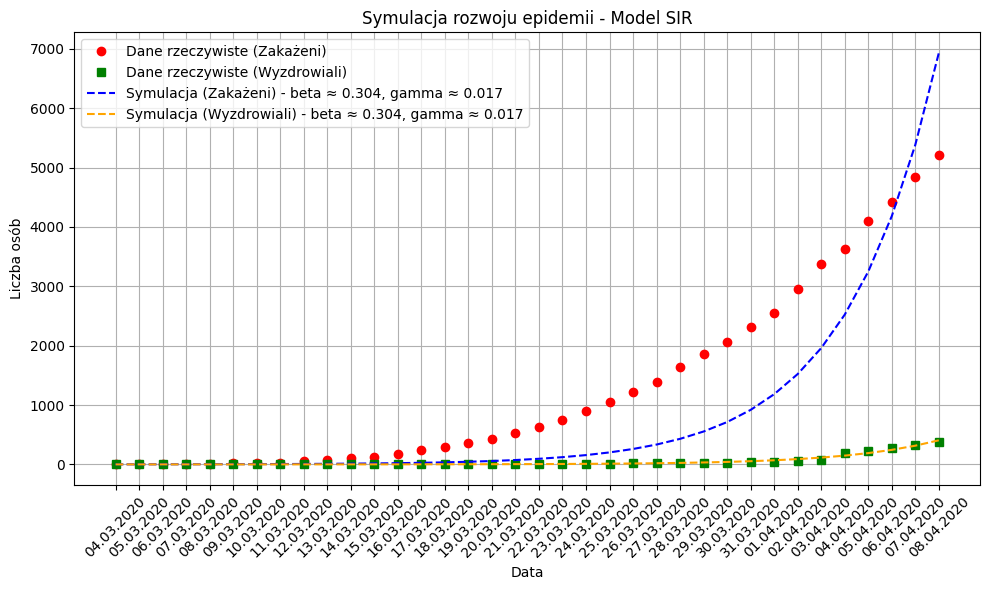

Najlepsza beta: 0.304, Najlepsza gamma: 0.017


In [625]:
import numpy as np
import matplotlib.pyplot as plt

def update_model(beta, gamma):
    t_max = len(dates)
    S = np.zeros(t_max)
    I = np.zeros(t_max)
    R = np.zeros(t_max)
    R0 = 0
    S[0] = S0  
    I[0] = I0  
    R[0] = R0  
    dt = 1 
    for t in range(1, t_max):
        dS = -beta * S[t-1] * I[t-1] * dt / n
        dI = beta * S[t-1] * I[t-1] * dt / n - gamma * I[t-1] * dt
        dR = gamma * I[t-1] * dt
        S[t] = S[t-1] + dS
        I[t] = I[t-1] + dI
        R[t] = R[t-1] + dR
    Se = S
    Ie = I
    Re = R
    return Se, Ie, Re

def mse(params):
    beta, gamma = params
    Se, Ie, Re = update_model(beta, gamma)
    mse_infected = np.mean((Ie - infected_data)**2)
    mse_recovered = np.mean((Re - recovery_data)**2)
    return mse_infected + mse_recovered

beta_values = np.linspace(0.15, 0.4, 500)  
gamma_values = np.linspace(0, 0.1, 500)  

best_mse = float('inf') 
best_beta = None         
best_gamma = None      

for beta in beta_values:
    for gamma in gamma_values:
        current_mse = mse([beta, gamma])
        if current_mse < best_mse:
            best_mse = current_mse
            best_beta = beta
            best_gamma = gamma

Se, Iesir, Resir = update_model(best_beta, best_gamma)

plt.figure(figsize=(10, 6))
plt.plot(range(len(dates)), infected_data, 'o', label='Dane rzeczywiste (Zakażeni)', color='red')
plt.plot(range(len(dates)), recovery_data, 's', label='Dane rzeczywiste (Wyzdrowiali)', color='green')
plt.plot(range(len(dates)), Iesir, label=f'Symulacja (Zakażeni) - beta ≈ {best_beta:.3f}, gamma ≈ {best_gamma:.3f}', linestyle='--', color='blue')
plt.plot(range(len(dates)), Resir, label=f'Symulacja (Wyzdrowiali) - beta ≈ {best_beta:.3f}, gamma ≈ {best_gamma:.3f}', linestyle='--', color='orange')

plt.xticks(range(len(dates)), dates, rotation=45)
plt.xlabel('Data')
plt.ylabel('Liczba osób')
plt.title('Symulacja rozwoju epidemii - Model SIR')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

print(f"Najlepsza beta: {best_beta:.3f}, Najlepsza gamma: {best_gamma:.3f}")



<a id="Wyniki-modelowania-metoda-Eulera-dla-SI-i-SIR"></a>
<h2>Wyniki modelowania metodą Eulera dla SI i SIR</h2><br>


### SI

Używając optymalnej wartości współczynnika transmisji $\beta$, wykresy przybierają podobny kształt. Warto zauważyć, że liczba zakażonych w symulacji rośnie w sposób zbliżony do rzeczywistych danych, co sugeruje, że model SI jest w stanie dobrze uchwycić podstawowe dynamiki rozwoju epidemii. Mimo ogólnej zgodności, można zauważyć pewne różnice w dynamice wzrostu liczby zakażonych. Liczba zakażonych oparta na danych rzeczywistych rośnie szybciej niż wyniki powstałe z modelu numerycznego. Dzieje się tak ponieważ metoda Eulera może mieć tendencję do nieco bardziej jednostajnego wzrostu, ponieważ zakłada stałą wartość $\beta$, a nie uwzględnia np. spadku efektywności transmisji w wyniku wprowadzenia działań ochronnych lub zmiany zachowań społecznych. W przypadku epidemii, gdzie interakcje są dynamiczne i mogą zmieniać się z dnia na dzień, prostota metody Eulera może powodować nieznaczne, ale stopniowo narastające błędy w przewidywaniach.

### SIR

W przypadku zakażonych $I(t)$, metoda Eulera dobrze odwzorowuje ogólny kształt wzrostu zakażeń, ale widać pewne niedoskonałości w dopasowaniu. Model ma tendencję do zbyt dużych "skoków" między dniami, ponieważ metoda Eulera oblicza zmiany na podstawie wartości w poprzednim punkcie, co może prowadzić do zbyt dużych przyrostów w jednym kroku czasowym $h$. Wykres jest lepiej dopasowany niż w modelu SI, ponieważ $\beta$ jest lepiej dopasowywane do danych. Dla liczby wyzdrowiałych osób $R(t)$, metoda Eulera wykazuje lepsze dopasowanie do danych rzeczywistych. Wynika to z faktu, że proces wyzdrowienia (związany z parametrem $\gamma$) jest bardziej stabilny i liniowy w czasie, a metoda Eulera dobrze odwzorowuje ten proces. Wartości liczby ozdrowieńców w modelu rosną stopniowo, co lepiej współpracuje z rzeczywistością, gdzie proces zdrowienia jest raczej powolny i regularny.

---

<a id="Metoda-Runge-Kutta-rzedu-4-RK4-rozwiazywania-rownan-rozniczkowych"></a>
<h1>Metoda Runge-Kutta rzędu 4 (RK4) rozwiązywania równań różniczkowych</h1><br>

### Wyjaśnienie metody Runge-Kutta rzędu 4 (RK4)

Metoda RK4 jest jedną z najczęściej używanych metod numerycznych do rozwiązywania równań różniczkowych zwyczajnych. Popularność zawdzięcza swojej wyjątkowej precyzji, będącej efektem wyższego rzędu dokładności w stosunku do prostszych metod, takich jak metoda Eulera.

Metoda Rungego-Kutty rzędu 4 (RK4) opiera się na następujących wzorach:

1. Początkowy warunek:
$$u_0 = \alpha$$

2. Wyznaczanie kolejnych współczynników:
$$k_1 = F(t, y_n)$$
$$k_2 = F\left(t + \frac{h}{2}, y_n + \frac{1}{2}k_1\right)$$
$$k_3 = F\left(t + \frac{h}{2}, y_n + \frac{1}{2}k_2\right)$$
$$k_4 = F\left(t + h, y_n\right)$$

3. Aktualizacja wartości $u_{i+1}$:
$$y_{i+1} = y_i + \frac{h}{6} \left(k_1 + 2k_2 + 2k_3 + k_4\right), \quad \text{dla } n = 0, 1, \ldots$$

Gdzie:
* ${h}$ — krok czasowy,
* ${F(t,y)}$ — funkcja opisująca równanie różniczkowe $\frac{dy}{dt} = F(t, y)$,
* ${t}$ — czas,
* ${y_n}$ — wartość rozwiązania w kroku ${n}$.

<a id="Numeryczne-rozwiazanie-metoda-Runge-Kutta-rzedu-4-modelu-SI"></a>
<h2>Numeryczne rozwiązanie metodą Runge-Kutta rzędu 4 modelu SI</h2><br>

Żeby obliczyc model SI numerycznie przyjmiemy zapis gdzie:
$$\frac{dy}{dt} = F(t, y)$$
oraz
$${y}=
\begin{bmatrix}
S\left(t\right) \\
I\left(t\right)
\end{bmatrix},
~~{F(t,y)}=\begin{bmatrix}
f\left(t,S,I\right) \\
g\left(t,S,I\right) 
\end{bmatrix}

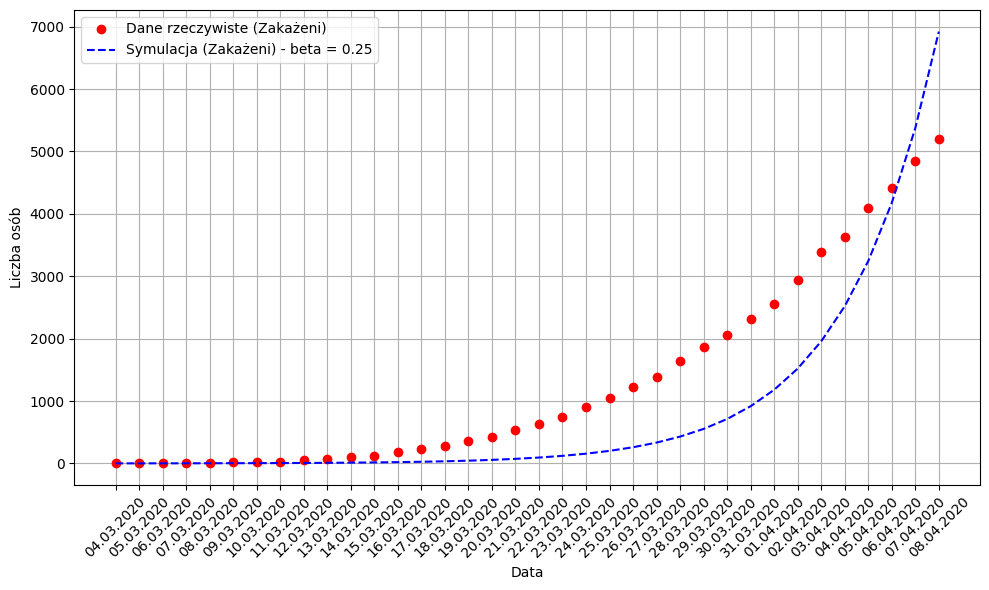

In [626]:
import matplotlib.pyplot as plt

# Funkcja dla modelu SI
def f(S, I, beta, N):
    return -beta * S * I / N

def g(S, I, beta, N):
    return beta * S * I / N

# RK4 dla modelu SI
def rk4_step(S, I, beta, N, h):
    k1_S = f(S, I, beta, N)
    k1_I = g(S, I, beta, N)
    
    k2_S = f(S + h * k1_S / 2, I + h * k1_I / 2, beta, N)
    k2_I = g(S + h * k1_S / 2, I + h * k1_I / 2, beta, N)
    
    k3_S = f(S + h * k2_S / 2, I + h * k2_I / 2, beta, N)
    k3_I = g(S + h * k2_S / 2, I + h * k2_I / 2, beta, N)
    
    k4_S = f(S + h * k3_S, I + h * k3_I, beta, N)
    k4_I = g(S + h * k3_S, I + h * k3_I, beta, N)
    
    # Klasyczna aktualizacja wartości
    S_new = S + h / 6 * (k1_S + 2 * k2_S + 2 * k3_S + k4_S)
    I_new = I + h / 6 * (k1_I + 2 * k2_I + 2 * k3_I + k4_I)
    
    return S_new, I_new

# Symulacja z najlepszym beta
S, I = n - infected_data[0], infected_data[0]
h = 1  # Krok czasowy (1 dzień)
Irksi = [I]  # Zmienna, do której zapisujemy wartości zakażonych
# Symulacja RK4 dla najlepszego beta
for t in range(1, len(dates)):
    S, I = rk4_step(S, I, best_beta_an, n, h)
    Irksi.append(I)  # Zapisanie wartości zakażonych do Irksi

# Wizualizacja wyników
plt.figure(figsize=(10, 6))
plt.plot(dates, infected_data, 'o', label='Dane rzeczywiste (Zakażeni)', color='red')
plt.plot(dates, Irksi, label=f'Symulacja (Zakażeni) - beta = {best_beta_an:.2f}', linestyle='--', color='blue')
plt.xticks(rotation=45)
plt.xlabel("Data")
plt.ylabel("Liczba osób")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



<a id="Numeryczne-rozwiazanie-metoda-Runge-Kutta-rzedu-4-modelu-SIR"></a>
<h2>Numeryczne rozwiązanie metodą Runge-Kutta rzędu 4 modelu SIR</h2><br>

Żeby obliczyc model SIR numerycznie przyjmiemy zapis gdzie:
$$\frac{dy}{dt} = F(t, y)$$
oraz
$${y}=
\begin{bmatrix}
S\left(t\right) \\
I\left(t\right) \\
R\left(t\right)
\end{bmatrix},
~~{F(t,y)}=\begin{bmatrix}
f\left(t,S,I,R\right) \\
g\left(t,S,I,R\right) \\
j\left(t,S,I,R\right)
\end{bmatrix}

In [627]:
import numpy as np
import matplotlib.pyplot as plt

# Funkcje SIR
def f(S, I, beta, n):
    return -beta * S * I / n

def g(S, I, beta, gamma, n):
    return beta * S * I / n - gamma * I

def j(I, gamma):
    return gamma * I

# RK4 dla modelu SIR
def rk4_step(S, I, R, beta, gamma, h, n):
    k1_S = f(S, I, beta, n)
    k1_I = g(S, I, beta, gamma, n)
    k1_R = j(I, gamma)
    
    k2_S = f(S + h * k1_S / 2, I + h * k1_I / 2, beta, n)
    k2_I = g(S + h * k1_S / 2, I + h * k1_I / 2, beta, gamma, n)
    k2_R = j(I + h * k1_I / 2, gamma)
    
    k3_S = f(S + h * k2_S / 2, I + h * k2_I / 2, beta, n)
    k3_I = g(S + h * k2_S / 2, I + h * k2_I / 2, beta, gamma, n)
    k3_R = j(I + h * k2_I / 2, gamma)
    
    k4_S = f(S + h * k3_S, I + h * k3_I, beta, n)
    k4_I = g(S + h * k3_S, I + h * k3_I, beta, gamma, n)
    k4_R = j(I + h * k3_I, gamma)
    
    S_new = S + h / 6 * (k1_S + 2 * k2_S + 2 * k3_S + k4_S)
    I_new = I + h / 6 * (k1_I + 2 * k2_I + 2 * k3_I + k4_I)
    R_new = R + h / 6 * (k1_R + 2 * k2_R + 2 * k3_R + k4_R)
    
    return S_new, I_new, R_new

# Funkcja do obliczania MSE
def mse(params, n, dates, infected_data, recovery_data):
    beta, gamma = params  # Parametry beta i gamma
    S, I, R = n - infected_data[0] - recovery_data[0], infected_data[0], recovery_data[0]
    h = 1  # Krok czasowy (1 dzień)
    I_vals = [I]
    R_vals = [R]
    
    # Symulacja RK4 dla danej pary beta i gamma
    for t in range(1, len(dates)):
        S, I, R = rk4_step(S, I, R, beta, gamma, h, n)
        I_vals.append(I)
        R_vals.append(R)
    
    # Obliczenie MSE na podstawie danych o zakażonych i wyzdrowiałych
    mse_infected = np.mean((np.array(I_vals[:len(dates)]) - np.array(infected_data))**2)
    mse_recovered = np.mean((np.array(R_vals[:len(dates)]) - np.array(recovery_data))**2)
    
    # Sumowanie MSE dla obu serii danych
    return mse_infected + mse_recovered


# Zakresy dla beta i gamma
beta_range = np.linspace(0.15, 0.4, 500)  # Zakres wartości beta
gamma_range = np.linspace(0.01, 0.1, 500)  # Zakres wartości gamma

# Wyszukiwanie najlepszych wartości beta i gamma
best_mse = np.inf
best_beta = None
best_gamma = None

# Sprawdzanie różnych kombinacji beta i gamma
for beta in beta_range:
    for gamma in gamma_range:
        current_mse = mse([beta, gamma], n, dates, infected_data, recovery_data)
        if current_mse < best_mse:
            best_mse = current_mse
            best_beta = beta
            best_gamma = gamma

# Symulacja z najlepszymi parametrami
S, I, R = n - infected_data[0] - recovery_data[0], infected_data[0], recovery_data[0]
h = 1  # Krok czasowy (1 dzień)
Irksir = [I]  # Inicjalizacja listy Irksir
Rrksir = [R]  # Inicjalizacja listy Rrk

# Symulacja RK4 dla najlepszych wartości beta i gamma
for t in range(1, len(dates)):
    S, I, R = rk4_step(S, I, R, best_beta, best_gamma, h, n)
    Irksir.append(I)  # Zapisanie wartości I do Irksir
    Rrksir.append(R)  # Zapisanie wartości R do Rrk

# Wizualizacja wyników
plt.figure(figsize=(10, 6))
plt.plot(dates, infected_data, 'o', label='Dane rzeczywiste (Zakażeni)', color='red')
plt.plot(dates, recovery_data, 's', label='Dane rzeczywiste (Wyzdrowiali)', color='green')
plt.plot(dates, Irksir, label=f'Symulacja (Zakażeni) - beta = {best_beta:.2f}, gamma = {best_gamma:.2f}', linestyle='--', color='blue')
plt.plot(dates, Rrksir, label=f'Symulacja (Wyzdrowiali) - beta = {best_beta:.2f}, gamma = {best_gamma:.2f}', linestyle='--', color='orange')
plt.xticks(rotation=45)
plt.grid(True)
plt.xlabel("Data")
plt.ylabel("Liczba osób")
plt.legend()
plt.tight_layout()
plt.show()

# Wyświetlenie najlepszych wartości beta i gamma
print(f"Najlepsze beta: {best_beta:.3f}")
print(f"Najlepsze gamma: {best_gamma:.3f}")


KeyboardInterrupt: 

<a id="Wyniki-modelowania-przy-uzyciu-metody-Runge-Kutta"></a>
<h2>Wyniki modelowania przy użyciu metody Runge-Kutta</h2><br>


### SI

Używając optymalnego $\beta$ (tego samego co dla modelu SI metodą Eulera)  możemy zauważyć, że metoda RK4 lepiej dopasowuje się do danych w porównaniu do metody Eulera. Wynika to z faktu, że RK4 wykonuje cztery oceny pochodnej na każdym kroku, co pozwala lepiej uchwycić zmiany w funkcji. Jednakże zbyt duży krok czasowy może również wpłynąć na dokładność w metodzie RK4. Pomimo tego RK4 jest lepiej sobie radzi przy wiekszych krokach czasowych, ponieważ dodaje więcej "kroków pośrednich" w celu uzyskania lepszej średniej wartości. Dzięki temu poprawia się przybliżenie trajektorii, co wpływa na kształt wykresów $ I(t)$ oraz $S(t)$. Czyni ją bardziej elastyczną i skuteczną w wielu przypadkach, gdzie dokładność jest istotna, a czas symulacji długi. Jest szczególnie ważne w analizie szybkiego rozprzestrzeniania się chorób w początkowej fazie epidemii.

### SIR

Metoda RK4 (Runge-Kutta czwartego rzędu) dosyć dobrą dokładność w obliczaniu wartości w systemach różniczkowych, takich jak model SIR. Wyniki uzyskane za pomocą RK4 są niemal identyczne z tymi uzyskanymi metodą Eulera. Dzieję sie tak, ponieważ obie funkcje mają ten sam krok czasowy $h$ oraz w obu rozwiązaniach indywidualnie dopasowujemy współczynniki $\beta$ oraz $\gamma$ do danych za pomocą metody MSE. Pozwala to na wiekszą precyzję. Jeśli byśmy podali obu funkcjom te same współczynniki, moglibyśmy zobaczyć różnice pojawiające się ze względu na wiekszą dokładność RK4.

---

<a id="Porownanie-bledow-numerycznych"></a>
<h1>Porównanie błędów numerycznych</h1><br>

<a id="Analityczne-rozwiązanie-modelu-SI"></a>
<h2>Analityczne rozwiązanie modelu SI</h2><br>

Poniżej znajduje się analityczne rozwiązanie modelu SI, które pozwoli nam porównać oczekiwane wartości liczone wzorem $(7)$ oraz wyniki otrzymane za pomocą metod numerycznych.

In [616]:
import numpy as np

t = np.linspace(0, 36, 36)  # Czas w dniach

# Funkcja analityczna dla SI
def SI_analytical(N, I0, beta, t):
    S0 = N - I0
    I_t = (I0 * np.exp(beta * t)) / (S0 + I0 * (np.exp(beta * t) - 1))
    return I_t

# Wyniki modelu z najlepszym beta
IsiAN = SI_analytical(N, I0, best_beta, t) * N

<a id="Obliczanie-bledu-dla-metody-Eulera-i-RK4"></a>
<h2>Obliczanie błędu dla metody Eulera i RK4</h2><br>

### Wzór na błąd:

$\epsilon(\Delta t) = \sup_{t \in [0,T]} |S(t) - Se(t)|$

gdzie:
- $S(t)$ to wartości obliczone metodą Eulera,
- $Se(t)$ to wartości obliczone metodą Eulera przy danym kroku czasowym \(\Delta t\),
- $Srk(t)$ to wartości obliczone metodą Rungego-Kutty,
- $Irk(t)$ to rzeczywiste rozwiązanie.

### Kroki obliczeniowe:

1. **Oblicz błąd metody Eulera**:
    
    $\epsilon_E(\Delta t) = \sup_{t \in [0,T]} |I(t) - Ie(t)|$
    
2. **Oblicz błąd metody Rungego-Kutty**:
    
    $\epsilon_{RK}(\Delta t) = \sup_{t \in [0,T]} |I(t) - Irk(t)|$

## Wykresy porównujące metody numeryczne z metodą analityczną
<a id="Wykresy-porownujace-metody-numeryczne-z-metoda-analityczna"></a>
<h2>Wykresy porównujące metody numeryczne z metodą analityczną</h2><br>

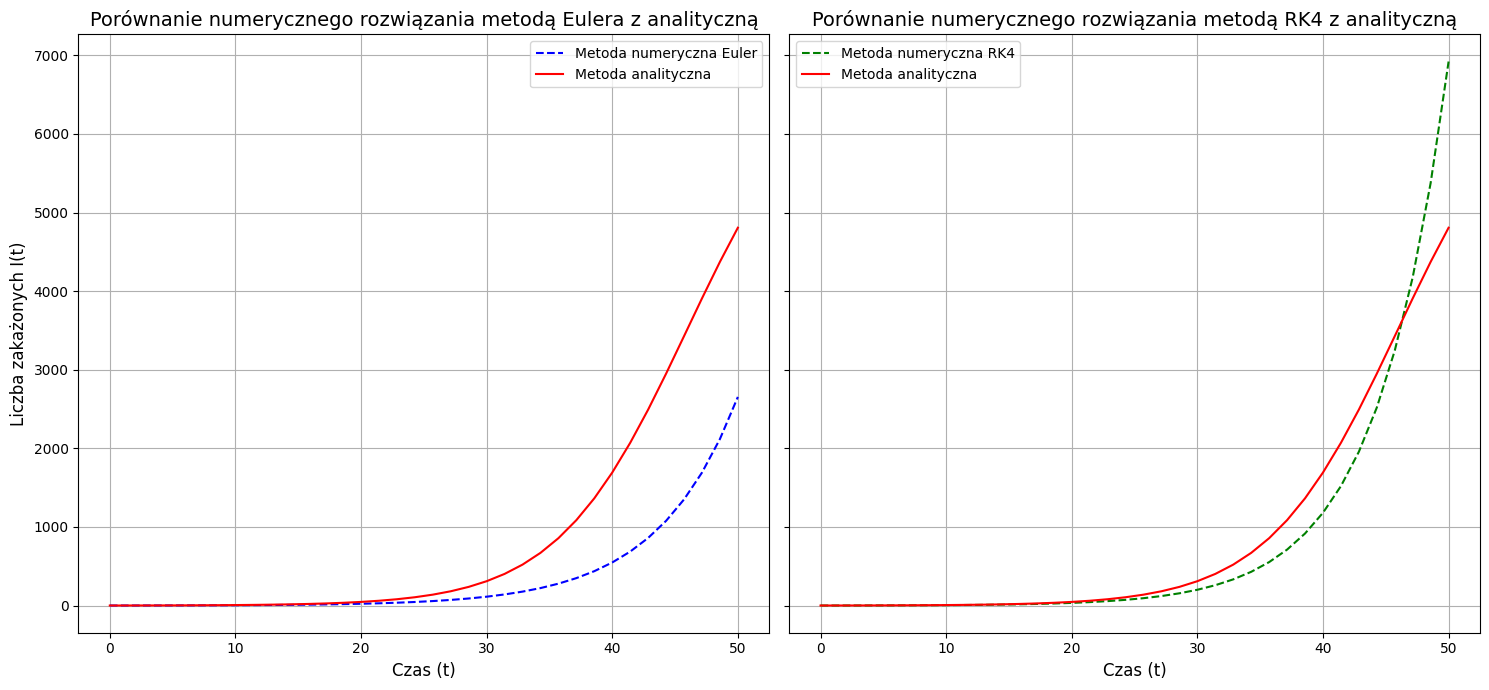

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 50, len(Iesi))  

fig, axs = plt.subplots(1, 2, figsize=(15, 7), sharey=True)

axs[0].plot(t, Iesi, label='Metoda numeryczna Euler', linestyle='--', color='blue')
axs[0].plot(t, IsiAN, label='Metoda analityczna ', linestyle='-', color='red')
axs[0].set_title('Porównanie numerycznego rozwiązania metodą Eulera z analityczną', fontsize=14)
axs[0].set_xlabel('Czas (t)', fontsize=12)
axs[0].set_ylabel('Liczba zakażonych I(t)', fontsize=12)
axs[0].legend(fontsize=10)
axs[0].grid(True)

axs[1].plot(t, Irksi, label='Metoda numeryczna RK4', linestyle='--', color='green')
axs[1].plot(t, IsiAN, label='Metoda analityczna ', linestyle='-', color='red')
axs[1].set_title('Porównanie numerycznego rozwiązania metodą RK4 z analityczną', fontsize=14)
axs[1].set_xlabel('Czas (t)', fontsize=12)
axs[1].legend(fontsize=10)
axs[1].grid(True)

plt.tight_layout()
plt.show()


### Wnioski
Na podstawie analizy wykresów można zauważyć, że rozwiązania numeryczne obu metod zaczynają odbiegać od rozwiązań analitycznych wraz z upływem czasu. Pomimo zastosowania optymalnie dobranej wartości parametru $\beta$, wspólnej dla wszystkich metod, wykresy nie pokrywają się idealnie. Rozbieżności te wynikają głównie z uproszczonej formy modelu SI, która i nie uwzględnia dodatkowych czynników wpływających na epidemię, takich jak np. zmiany w zachowaniu populacji. Jednakże metoda RK4 wykazuje znacznie większą dokładność rozwiązań w porównaniu do metody Eulera. Na wykresie widać, że krzywa uzyskana metodą RK4 znacznie bardziej przypomina krzywą analityczną.

<a id="Wykres-bledow"></a>
<h2>Wykres błędów</h2><br>

<>:19: SyntaxWarning: invalid escape sequence '\e'
<>:20: SyntaxWarning: invalid escape sequence '\e'
<>:22: SyntaxWarning: invalid escape sequence '\D'
<>:24: SyntaxWarning: invalid escape sequence '\e'
<>:19: SyntaxWarning: invalid escape sequence '\e'
<>:20: SyntaxWarning: invalid escape sequence '\e'
<>:22: SyntaxWarning: invalid escape sequence '\D'
<>:24: SyntaxWarning: invalid escape sequence '\e'
C:\Users\lunka\AppData\Local\Temp\ipykernel_15764\2674562863.py:19: SyntaxWarning: invalid escape sequence '\e'
  plt.plot(t_num, diff_sie, label='$\epsilon_{Euler}$', marker='o', linestyle='-', color='blue')
C:\Users\lunka\AppData\Local\Temp\ipykernel_15764\2674562863.py:20: SyntaxWarning: invalid escape sequence '\e'
  plt.plot(t_num, diff_sirk, label='$\epsilon_{RK4}$', marker='x', linestyle='--', color='green')
C:\Users\lunka\AppData\Local\Temp\ipykernel_15764\2674562863.py:22: SyntaxWarning: invalid escape sequence '\D'
  plt.title(f'Wykres dla $\Delta t = {delta_t}$', fontsize=14

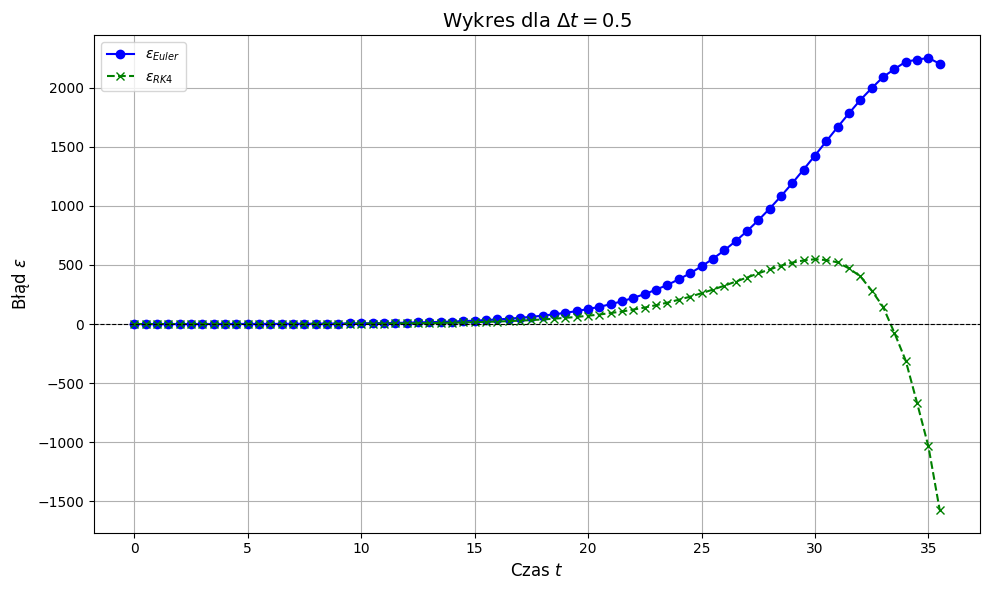

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

delta_t = 0.5
T = 36  
t_high_res = np.linspace(0, T, 1000)
IsiAN_high_res = np.interp(t_high_res, np.linspace(0, T, len(IsiAN)), IsiAN)
t_num = np.arange(0, T, delta_t)

IsiAN_interp = np.interp(t_num, t_high_res, IsiAN_high_res)
Isie_interp = np.interp(t_num, np.linspace(0, T, len(Iesi)), Iesi)
Isirk_interp = np.interp(t_num, np.linspace(0, T, len(Irksi)), Irksi)

diff_sie = np.abs(IsiAN_interp - Isie_interp)
diff_sirk = np.abs(IsiAN_interp - Isirk_interp)

plt.figure(figsize=(10, 6))
plt.plot(t_num, diff_sie, label=r'$\epsilon_{Euler}$', marker='o', linestyle='-', color='blue')
plt.plot(t_num, diff_sirk, label=r'$\epsilon_{RK4}$', marker='x', linestyle='--', color='green')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.title(r'Wykres dla $\Delta t = {0}$'.format(delta_t), fontsize=14)
plt.xlabel(r'Czas $t$', fontsize=12)
plt.ylabel(r'Błąd $\epsilon$', fontsize=12)
plt.grid(True)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()


### Wnioski
Na wykresie widać, że błąd metody numerycznej Eulera rośnie znacznie szybciej niż metody RK4, co oznacza że metoda Runegego-Kutty dostarcza bardziej dokładne wyniki niż metoda Eulera. Dla obu metoda błąd rośnie wraz z czasem, ma charakter wykładniczy, co wskazuje na wskazuje na akumulacje błędu w obliczeniach numerycznych. Podsumowywując metod Rungego-Kuttego, jest lepsza pod względem dokładności w porównaniu z metodą Eulera. Metoda numeryczna RK4 jest bardziej odpowiednia w przypadku dłuższych symulacji numerycznych.

<a id="Wykres-logarytmiczny"></a>
<h2>Wykres logarytmiczny</h2><br>

<>:18: SyntaxWarning: invalid escape sequence '\e'
<>:19: SyntaxWarning: invalid escape sequence '\e'
<>:23: SyntaxWarning: invalid escape sequence '\e'
<>:18: SyntaxWarning: invalid escape sequence '\e'
<>:19: SyntaxWarning: invalid escape sequence '\e'
<>:23: SyntaxWarning: invalid escape sequence '\e'
C:\Users\lunka\AppData\Local\Temp\ipykernel_15764\590949635.py:18: SyntaxWarning: invalid escape sequence '\e'
  plt.plot(t_num, diff_sie, label='$log(\epsilon)_{Euler}$', marker='o', linestyle='-', color='blue')
C:\Users\lunka\AppData\Local\Temp\ipykernel_15764\590949635.py:19: SyntaxWarning: invalid escape sequence '\e'
  plt.plot(t_num, diff_sirk, label='$log(\epsilon)_{RK4}$', marker='x', linestyle='--', color='green')
C:\Users\lunka\AppData\Local\Temp\ipykernel_15764\590949635.py:23: SyntaxWarning: invalid escape sequence '\e'
  plt.ylabel('$log(\epsilon)$', fontsize=12)


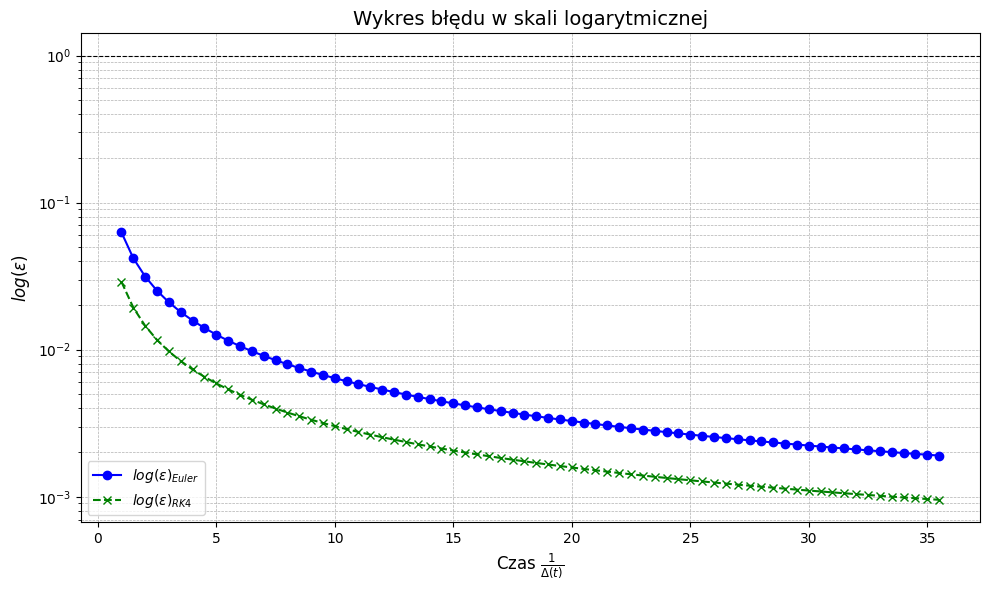

In [619]:
import numpy as np
import matplotlib.pyplot as plt

delta_t = 0.5  
T = 36  
t_high_res = np.linspace(0, T, 1000)

IsiAN_high_res = np.interp(t_high_res, np.linspace(0, T, len(IsiAN)), IsiAN)
t_num = np.arange(delta_t, T, delta_t) 

IsiAN_interp = np.interp(t_num, t_high_res, IsiAN_high_res)
Isie_interp = np.interp(t_num, np.linspace(0, T, len(Iesi)), Iesi)
Isirk_interp = np.interp(t_num, np.linspace(0, T, len(Irksi)), Irksi)

diff_sie = np.abs(IsiAN_interp - Isie_interp)  
diff_sirk = np.abs(IsiAN_interp - Isirk_interp)

log_diff_sie = np.log10(diff_sie + 1e-10)  
log_diff_sirk = np.log10(diff_sirk + 1e-10)

t_num_inv = 1 / t_num  

plt.figure(figsize=(10, 6))
plt.plot(t_num_inv, log_diff_sie, label=r'$log(\epsilon)_{Euler}$', marker='o', linestyle='-', color='blue')
plt.plot(t_num_inv, log_diff_sirk, label=r'$log(\epsilon)_{RK4}$', marker='x', linestyle='--', color='green')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.title('Wykres błędu w skali logarytmicznej (z odwrotnością czasu)', fontsize=14)
plt.xlabel(r'$1/t$', fontsize=12)
plt.ylabel(r'$log(\epsilon)$', fontsize=12)
plt.yscale('log')  
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlim(0, 0.2)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()


### Wnioski 
W skali logarytmicznej wyraźnie widać, że metoda RK4 osiągna mniejsze różnice w porównaniu z metoda Eulera na całym przedziale czasowym, różnice są rzędu $10^{(-2)}$ dla metody Eulera, a dla metody RK4 $10^{(-3)}$, co wskazuje na większą precyzje. Widać, że wykres błedu RK4 spada szybciej do zera co wkazuje na większą dokładność. Podsumowywując analiza w skali logarytmicznej podkreśla przewage metody RK4 nad metodą Eulera, szczególnie pozwala zobaczyć różnice błędów w początkowej fazie gdzie różnice są małe.

---

<a id="Podsumowanie"></a>
<h1>Podsumowanie</h1><br>

---

<a id="Literatura"></a>
<h1>Literatura</h1><br>

https://www.youtube.com/watch?v=2GEzDzbMkpk&t=1098s&ab_channel=ICMUniversityofWarsaw - fajny filmik o modelowaniu epidemii uwzględnia rozwój epidemii w Polsce, konkretne miasta dużo przydatnych materiałów dobry wzór

https://sc21.icm.edu.pl/index.php/icm-epidemiological-model/ - Artykuł twórcy filmiku różne wykresy

https://www.youtube.com/watch?v=j46osLueJKc&ab_channel=FranciszekRakowski - filmik pokazujacy rozprzestrzenianie sie epidemii w Polsce (Graf)

https://kosmos.ptpk.org/index.php/Kosmos/article/download/2828/2719/5664 - wytłumaczenie modelu SIR, SEIR oraz SI

https://koronawirusunas.pl/ - wszystkie dane dotyczace koronawirusa w Polsce od poczatku epidemii

https://www.iorajournal.org/ijgor/article/view/67/73 - artykul o analizie SIR przy uzyciu metod numerycznych

https://youtu.be/ukNbG7muKho?si=aFuv6m7yGa3H3dvo - Metoda Eulera

https://foton.if.uj.edu.pl/documents/12579485/149668788/E_G-N.pdf/8f29f7de-63b5-4709-8bba-57e3461f790b - SI, SIS, SIR artykul Uniwersytetu Jagiellonskiego 

https://blog.tonytsai.name/blog/2014-11-24-rk4-method-for-solving-sir-model - uzycie rk4 na SIR